# The Spark Foundation - Internship

### Task 6 : Prediction using Decision Tree  Algorithm


● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


### Author - Md. Muntasirul Hoque

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Suppress warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('Iris.csv')
print("Data imported successfully")

Data imported successfully


### Data Exploration
Lets first have a descriptive exploration on our data.

In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.shape

(150, 6)

There are  150 rows and 6 columns

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

Balance Dataset

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

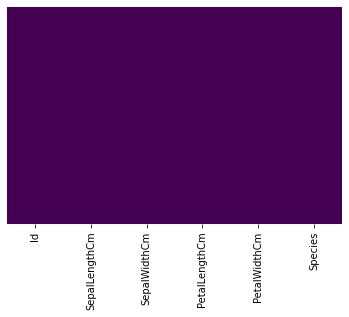

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are no null values in the dataset

In [11]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

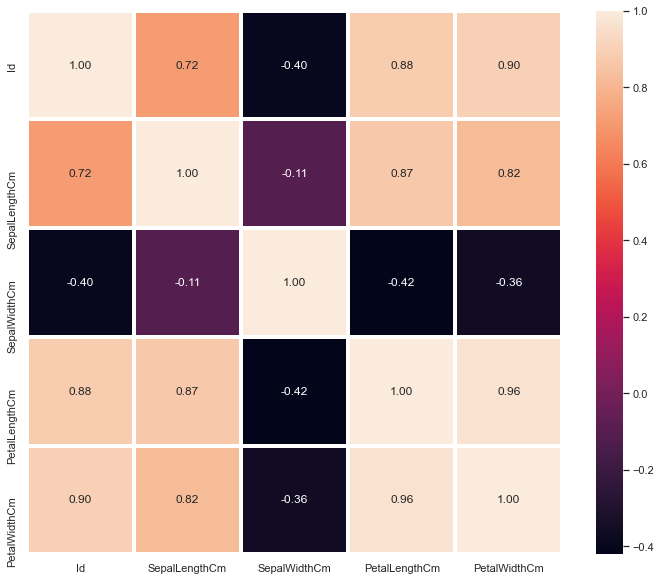

In [12]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Visualization

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


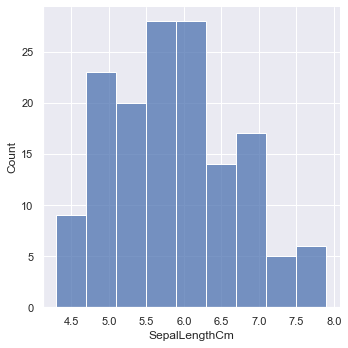

In [15]:
sns.displot(df['SepalLengthCm'])

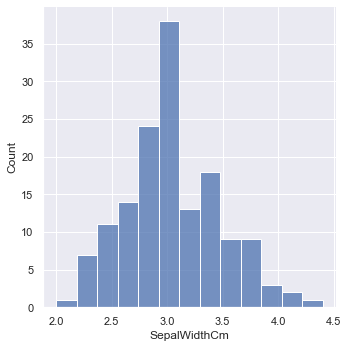

In [16]:
sns.displot(df['SepalWidthCm'])

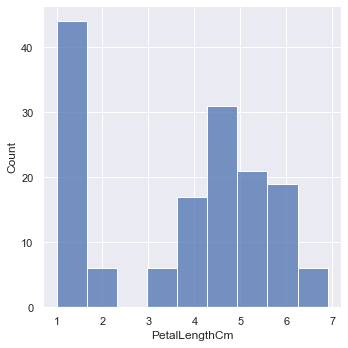

In [17]:
sns.displot(df['PetalLengthCm'])

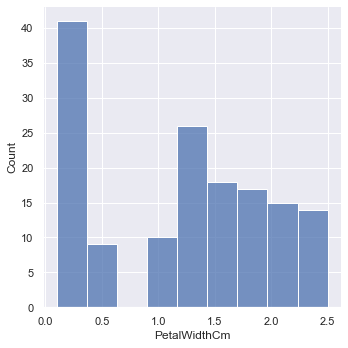

In [18]:
sns.displot(df['PetalWidthCm'])

### Outlier Checking

<AxesSubplot:xlabel='SepalLengthCm'>

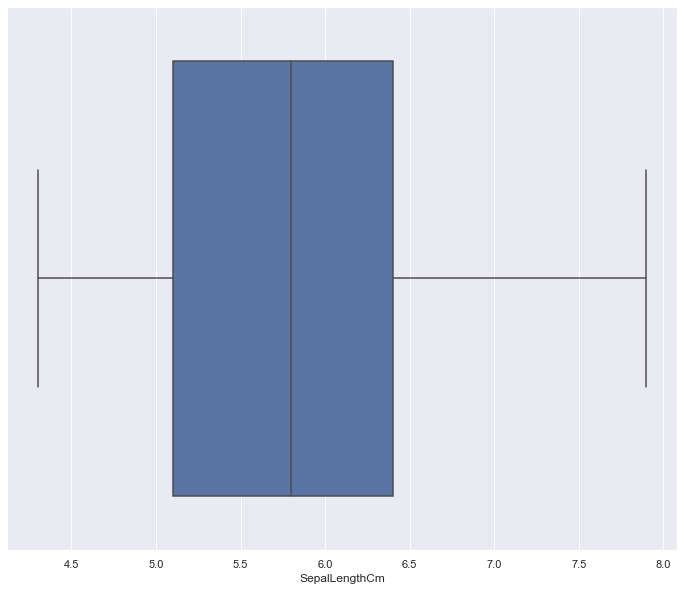

In [19]:
sns.boxplot(x=df['SepalLengthCm'],data=df)

<AxesSubplot:xlabel='PetalLengthCm'>

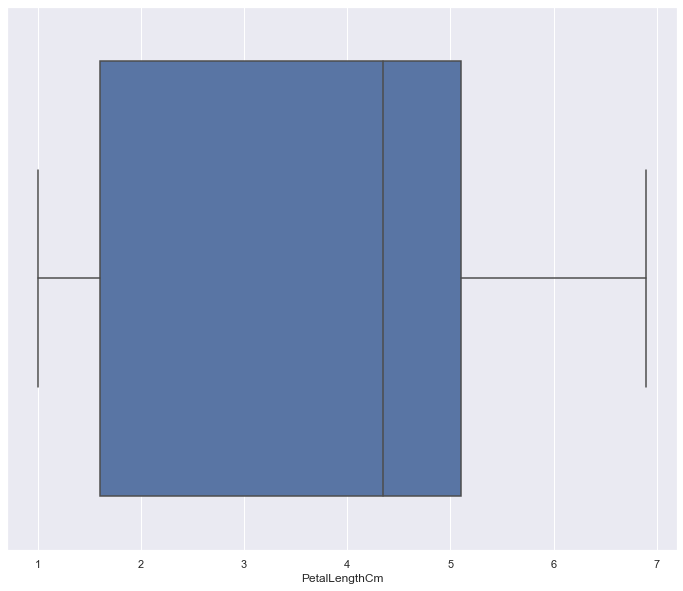

In [20]:
sns.boxplot(x=df['PetalLengthCm'],data=df)

<AxesSubplot:xlabel='PetalWidthCm'>

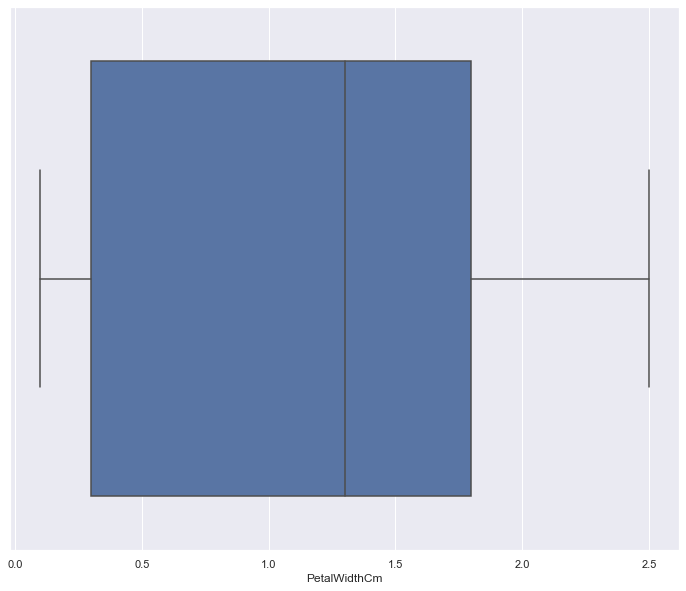

In [21]:
sns.boxplot(x=df['PetalWidthCm'],data=df)

<AxesSubplot:xlabel='SepalWidthCm'>

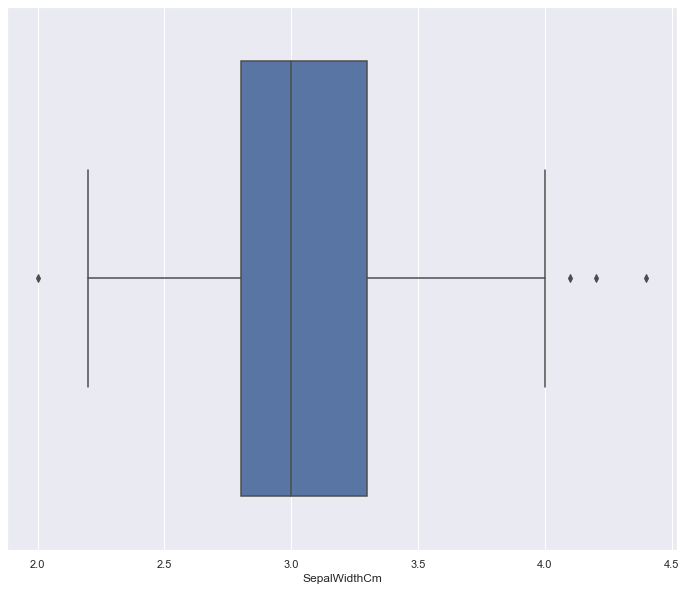

In [22]:
sns.boxplot(x=df['SepalWidthCm'],data=df)

Here we can see that only SepalWidthCm column has outliers and we have deal with it

### Outliers treatment

In [23]:
IQR=df.SepalWidthCm.quantile(0.75)-df.SepalWidthCm.quantile(0.25)
IQR

0.5

In [24]:
lower_bridge=df.SepalWidthCm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.SepalWidthCm.quantile(0.75)+(IQR*1.5)

print(lower_bridge),print(upper_bridge)

2.05
4.05


(None, None)

In [25]:
df.loc[df['SepalWidthCm']>=4.05,'SepalWidthCm']=4.05

In [26]:
df.loc[df['SepalWidthCm']<2.05,'SepalWidthCm']=2.05

<AxesSubplot:xlabel='SepalWidthCm'>

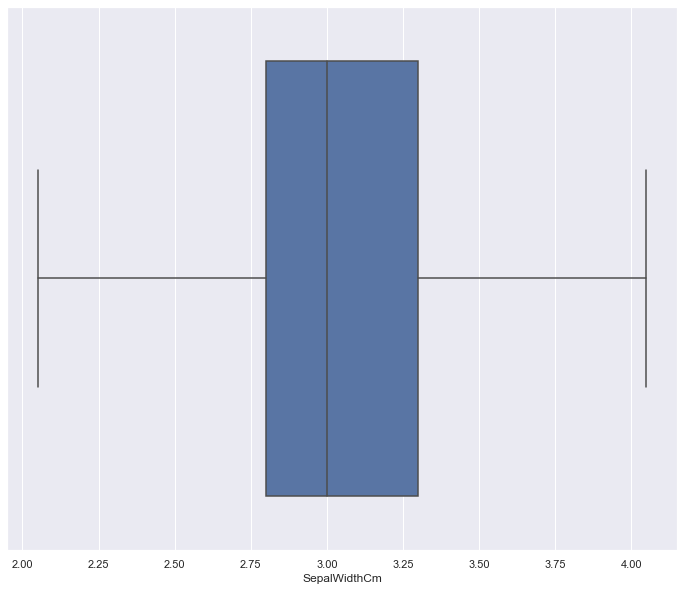

In [27]:
sns.boxplot(x=df['SepalWidthCm'],data=df)


There is no outlier now

### Taking care of catagorical variable

In [28]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [30]:
df['Species'] = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [31]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [32]:
df=df.drop(['Id'], axis = 1)


In [33]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [34]:
X = df.iloc[:,:-1]

In [35]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y = df.iloc[:,-1:]

### Setting up the Decision Tree

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

### Modeling

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
dTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction

In [42]:
predTree = dTree.predict(X_testset)

### Confusion Matrix

In [43]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

confusion_matrix( y_testset,predTree)

array([[17,  0,  0],
       [ 0, 10,  4],
       [ 0,  0, 14]], dtype=int64)

### Calssification Report

In [44]:
print(classification_report(y_testset,predTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.71      0.83        14
           2       0.78      1.00      0.88        14

    accuracy                           0.91        45
   macro avg       0.93      0.90      0.90        45
weighted avg       0.93      0.91      0.91        45



### Evaluation

In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9111111111111111


### Model Visuvalization

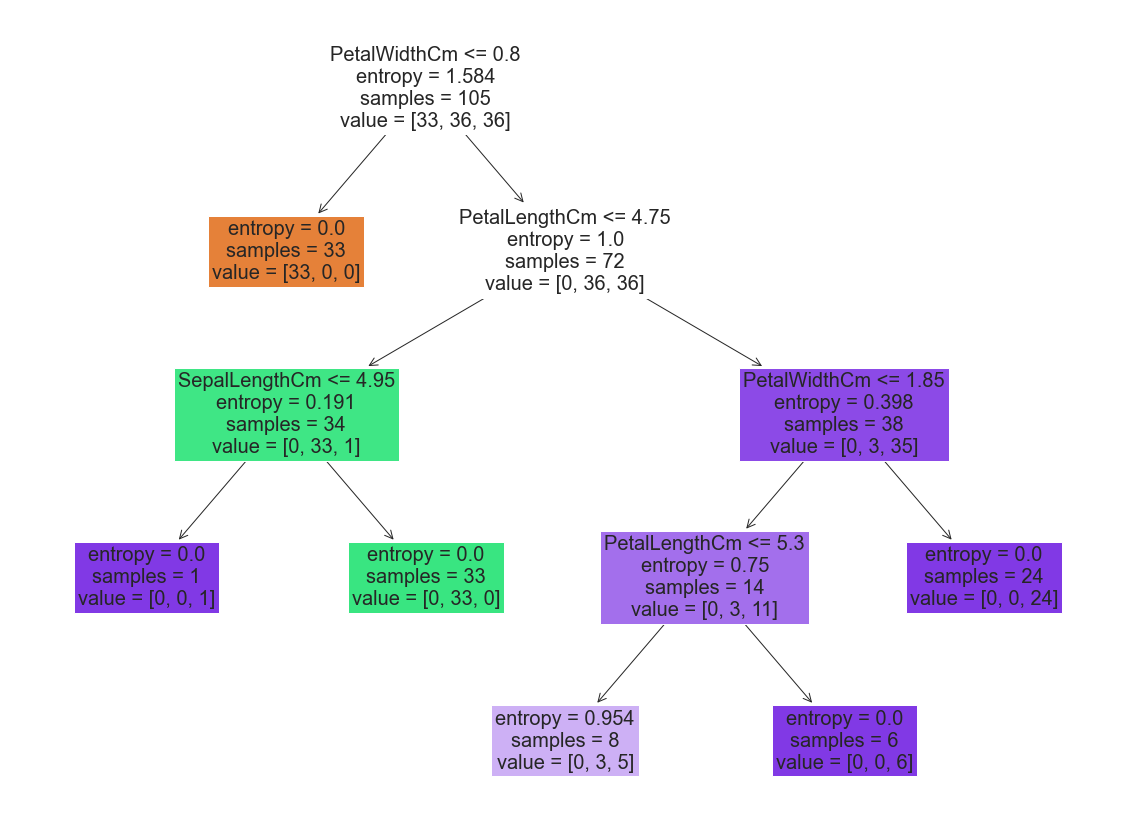

In [46]:
from sklearn import tree
plt.figure(figsize=(20,15))
dtc_plot = tree.plot_tree(dTree,feature_names=X.columns,filled=True,fontsize=20)

### Prediction On Randomly Created Data

In [47]:

new_df_data =  pd.DataFrame({'SepalLengthCm':[4.3,5.2,6.2,5.3,4.7],
                         'SepalWidthCm':[2.1,2.4,3.1,3.3,4.2],
                         'PetalLengthCm':[1.2,2.3,3.3,4.3,5.3],
                         'PetalWidthCm':[0.3,0.8,1.6,1.7,2.1]})
new_df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.3,2.1,1.2,0.3
1,5.2,2.4,2.3,0.8
2,6.2,3.1,3.3,1.6
3,5.3,3.3,4.3,1.7
4,4.7,4.2,5.3,2.1


In [48]:
new_predict = dTree.predict(new_df_data)
new_df_data['Predicted_Species'] = new_predict
new_df_data['Predicted_Species'] = new_df_data['Predicted_Species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
new_df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_Species
0,4.3,2.1,1.2,0.3,Iris-setosa
1,5.2,2.4,2.3,0.8,Iris-setosa
2,6.2,3.1,3.3,1.6,Iris-versicolor
3,5.3,3.3,4.3,1.7,Iris-versicolor
4,4.7,4.2,5.3,2.1,Iris-virginica
